# Problema 2. El quiosquero

Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.

Periódicos 30 40 50 60 70
f(x) 20 % 25 % 25 % 20 % 10 %

La tabla recoge por ejemplo que el 20 % del tiempo las ventas han sido de 30 periódicos. Teniendo en cuenta el coste de 0,20 euros por venta perdida y el coste de 0,10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario si pide 50 periódicos cada día.

### 1. Identificamos las variables

Tenemos la variable de *ventas* que determinará nuestra otra variable de *beneficio*

In [164]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [165]:
def ventas_simuladas():
    ventas=0
    num_aleatorio = random.uniform(0.01, 1)
    num  = round(num_aleatorio, 2)
    if 0.0 < num <= 0.20:
        ventas = 30
    elif 0.20 < num <= 0.45:
        ventas = 40
    elif 0.45 < num <= 0.70:
        ventas = 50
    elif 0.70 < num <= 0.90:
        ventas = 60
    elif 0.90 < num <= 1.00:
        ventas = 70
    return ventas

### 2. Defina el modelo del sistema y los objetivos de la simulación

Nuestro beneficio será dado por la siguiente ecuación: 

*beneficio* = (1.10)ventas_reales - (0.90)pedido - (0.10)no_vendidos - (0.20)ventas_perdidas

El objetivo será determinar el beneficio promedio por cierto numero de ventas aleatorias.

In [166]:
def beneficio_esperado(pedido):
    beneficio = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    ventas_del_dia = ventas_simuladas()
    
    if ventas_del_dia > pedido:
        ventas_reales = pedido
        ventas_perdidas = ventas_del_dia - pedido
        no_vendidos = 0 
        
    else:
        ventas_reales = ventas_del_dia
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    
    beneficio = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return beneficio

In [167]:
beneficio = beneficio_esperado(50)
print("Beneficio promedio diario:", round(beneficio, 2), "euros")

Beneficio promedio diario: -14.0 euros


### 3. Diseñe el experimento

In [168]:
def dias_simulados(dias):
    lista =[]
    beneficio_ = 0
    for i in range(dias):
        beneficio_ += beneficio_esperado(50)
        lista.append(beneficio_/(i+1))
    return lista

In [169]:
dias = int(input("Ingrese el número de días para simular: "))
exp = dias_simulados(dias)

Ingrese el número de días para simular: 500


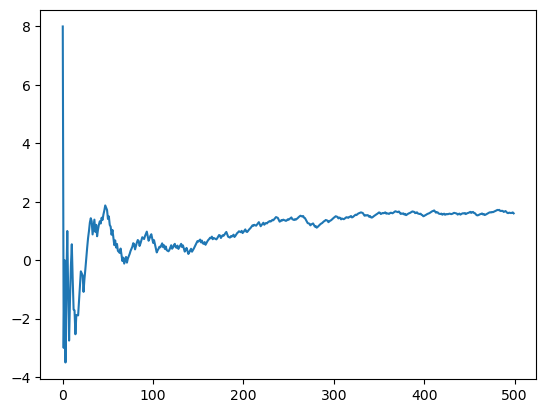

In [170]:
plt.plot(exp)

In [177]:
print(np.mean(exp), np.std(exp))

1.0899247933646155 0.7886204165919594


### 4. Repita el experimento n veces

In [172]:
def modelo(n):
    lista=[]
    for i in range(n):
        simulacion = dias_simulados(500)
        lista.append(np.mean(simulacion))
    return lista

In [173]:
exp2 = modelo(40)

In [174]:
print(np.mean(exp2), np.std(exp2))

1.5237666072132636 0.522259882429653


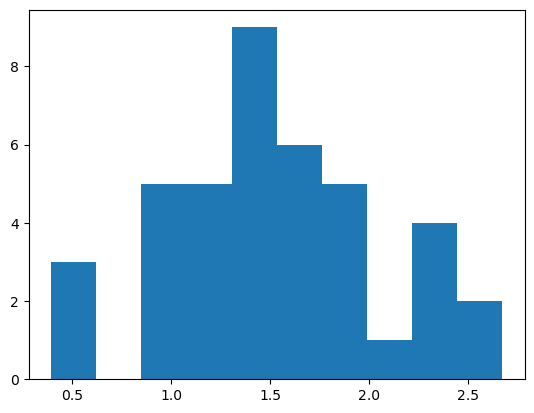

In [179]:
plt.hist(exp2)
plt.show()

In [178]:
print(np.mean(exp2), np.std(exp2))

1.5237666072132636 0.522259882429653


### 5. Hallamos el intervalo de confianza

In [176]:
np.mean(exp2) - 1.96*np.std(exp2)/np.sqrt(50), np.mean(exp2) + 1.96*np.std(exp2)/np.sqrt(50)

(1.3790035534854466, 1.6685296609410807)

In [181]:
N = (2*np.std(exp)*1.96/0.01)**2

### 6. Para determinar el número de simulaciones de ventas para optimizar

In [182]:
print(N)

95567.04701946156
